In [16]:
import pip
#pip.main(['install','yahoo-finance'])
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


import pandas_datareader
 

from pandas_datareader import data as pdr
import yahoo_finance as yf


In [20]:
df=pdr.get_data_yahoo('SPY','2017-01-01','2018-01-01')
df=df.dropna()
df=df[['Open','High','Low','Close']]
df.head(5)

,Open,High,Low,Close
Date,,,,
2017-01-03,225.039993,225.830002,223.880005,225.240005
2017-01-04,225.619995,226.750000,225.610001,226.580002
2017-01-05,226.270004,226.580002,225.479996,226.399994
2017-01-06,226.529999,227.750000,225.899994,227.210007
2017-01-09,226.910004,227.070007,226.419998,226.460007


In [23]:
df['open-close']=df.Open-df.Close
df['high-low']=df.High - df.Low
df=df.dropna()
X=df[['open-close','high-low']]

,open-close,high-low
Date,,
2017-01-03,-0.200012,1.949997
2017-01-04,-0.960007,1.139999
2017-01-05,-0.129990,1.100006
2017-01-06,-0.680008,1.850006


In [54]:
Y=np.where(df['Close'].shift(-1)>df['Close'],1,-1)

In [56]:
from sklearn.model_selection import train_test_split
split_per=0.7

X_train,X_test,Y_train,Y_test = train_test_split(X, Y, 
                                                   test_size=0.3, random_state=42)

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn=KNeighborsClassifier(n_neighbors=15)
knn=knn.fit(X_train,Y_train)
accuracy_train=accuracy_score(Y_train,knn.predict(X_train))
accuracy_test=accuracy_score(Y_test,knn.predict(X_test))

In [58]:
print('Train accuracy',accuracy_train)
print('Test accuracy',accuracy_test)

Train accuracy 0.596590909091
Test accuracy 0.526315789474


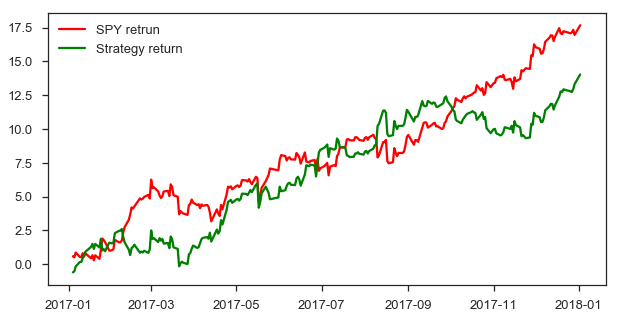

In [64]:

df['predicted_signal']=knn.predict(X)
df['SPY_return']=np.log(df['Close']/df['Close'].shift(1))
c_return=df['SPY_return'].cumsum()*100
df['Strategy_return']=df['SPY_return']*df['predicted_signal'].shift(1)
c_strategy_return=df['Strategy_return'].cumsum()*100
plt.figure(figsize=(10,5))
plt.plot(c_return,color='r',label='SPY retrun')
plt.plot(c_strategy_return,color='g',label='Strategy return')
plt.legend()
plt.show()